# Set up

In [1]:
import os
import json
import yaml
import shutil
import zipfile
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Import exported annotations

## wd

In [2]:
os.getcwd()

'/storage/ice1/2/4/jlee4338/ongoing/park_sign/nyc/code/annot'

In [3]:
!ls ../../cvat_export

always_keep_zip.txt	      export_0122_0921.zip
cvat_0129		      export_0122_0921_processed.zip
cvat_0129_processed.zip       export_0122_0921_processed_unzipped
cvat_0129_processed_unzipped  export_0128_1352
data_nc_1.yaml		      export_0128_1352.zip
data_nc_7.yaml		      export_0128_1352_fake
export_0122_0921


In [ ]:
#base_dir = "../../cvat_export/export_0122_0921"      
#base_dir = "../../cvat_export/export_0129_2234"                  

## unzip each exported dataset

In [5]:
def unzip_exported(name_of_exported):
    # unzip
    base_dir = "../../cvat_export"    
    zip_file_path = os.path.join(base_dir, name_of_exported+".zip")
    extract_to = os.path.join(base_dir, name_of_exported)
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Files extracted to: {extract_to}")
    
    for which_folder in ["images", "labels"]:
        # remove the /train dir
        base_dir = "../../cvat_export" # must reset for each loop
        base_dir = os.path.join(base_dir, name_of_exported)
        source_dir = os.path.join(base_dir, f"{which_folder}/train") 
        destination_dir = os.path.join(base_dir, f"{which_folder}")

        try:
            # Ensure the destination directory exists
            os.makedirs(destination_dir, exist_ok=True)

            # Iterate through all files in the source directory
            for filename in os.listdir(source_dir):
                source_path = os.path.join(source_dir, filename)
                destination_path = os.path.join(destination_dir, filename)

                # Move only files (not subdirectories)
                if os.path.isfile(source_path):
                    shutil.move(source_path, destination_path)
                    #print(f"Moved: {source_path} -> {destination_path}")

            print("All files have been moved successfully.")
        except FileNotFoundError:
            print("The source or destination directory does not exist.")
        except PermissionError:
            print("Permission denied. Ensure you have the necessary permissions.")
        except Exception as e:
            print(f"An error occurred: {e}")      

        try:
            os.rmdir(source_dir)
            print(f"Successfully removed the empty directory: {source_dir}")
        except FileNotFoundError:
            print("The directory does not exist.")
        except OSError:
            print("The directory is not empty or cannot be removed.")
        except Exception as e:
            print(f"An error occurred: {e}")

In [73]:
unzip_exported("export_0122_0921")

Files extracted to: ../../cvat_export/export_0122_0921
All files have been moved successfully.
Successfully removed the empty directory: ../../cvat_export/export_0122_0921/images/train
All files have been moved successfully.
Successfully removed the empty directory: ../../cvat_export/export_0122_0921/labels/train


In [74]:
unzip_exported("export_0129_2234")

Files extracted to: ../../cvat_export/export_0129_2234
All files have been moved successfully.
Successfully removed the empty directory: ../../cvat_export/export_0129_2234/images/train
All files have been moved successfully.
Successfully removed the empty directory: ../../cvat_export/export_0129_2234/labels/train


## integrate seamlessly

### export_0122_0921 ([:until_when])

In [75]:
base_dir = "../../cvat_export/export_0122_0921"

In [76]:
until_when = 2700
folder_path = os.path.join(base_dir, "images")

filenames_img = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
print(f"length of filenames_img: {len(filenames_img)}")

filenames_img = sorted(filenames_img)
filenames_img = filenames_img[:until_when]
print(f"length of filenames_img: {len(filenames_img)}")

length of filenames_img: 4974
length of filenames_img: 2700


In [77]:
filenames_img = [f.split(".j")[0] for f in filenames_img]
print(f"length of filenames_img: {len(filenames_img)}")

folder_path = os.path.join(base_dir, "labels")
filenames_lbl = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith(".txt")]
filenames_lbl = sorted(filenames_lbl)
print(f"length of filenames_lbl: {len(filenames_lbl)}")

filenames_lbl = [f for f in filenames_lbl if f.split(".t")[0] in filenames_img]
filenames_lbl = [f.split(".t")[0] for f in filenames_lbl]
print(f"length of filenames_lbl: {len(filenames_lbl)}")
print()
filenames_img = [f for f in filenames_img if f in filenames_lbl]
print(f"length of filenames_img: {len(filenames_img)}")
print()
print(filenames_img[0:5])
print(filenames_lbl[0:5])
print(filenames_img == filenames_lbl)

length of filenames_img: 2700
length of filenames_lbl: 3031
length of filenames_lbl: 758

length of filenames_img: 758

['signid_100-mutcd_R7-1-location_40.849854989,-73.89828847-heading_81.499', 'signid_100-mutcd_R7-1-location_40.849914685,-73.898255013-heading_139.414', 'signid_10000-mutcd_R7-51-location_40.712987445,-73.907559555-heading_222.59', 'signid_10000-mutcd_R7-51-location_40.712991965,-73.907642327-heading_147.066', 'signid_10001-mutcd_R7-51-location_40.712980208,-73.907427025-heading_221.412']
['signid_100-mutcd_R7-1-location_40.849854989,-73.89828847-heading_81.499', 'signid_100-mutcd_R7-1-location_40.849914685,-73.898255013-heading_139.414', 'signid_10000-mutcd_R7-51-location_40.712987445,-73.907559555-heading_222.59', 'signid_10000-mutcd_R7-51-location_40.712991965,-73.907642327-heading_147.066', 'signid_10001-mutcd_R7-51-location_40.712980208,-73.907427025-heading_221.412']
True


#### add 300 images without annotations
only for images, add 300 images without annotations to let the model also learn cases of absence, reducing false positive

In [78]:
until_when = 2700
folder_path = os.path.join(base_dir, "images")

temp = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
temp = [f.split(".j")[0] for f in temp]
print(len(temp))

temp = sorted(temp)
temp = temp[:until_when]
print(len(temp))

filenames_img_empty_to_add = [f for f in temp if f not in filenames_img]
print(len(filenames_img_empty_to_add))

4974
2700
1942


In [79]:
filenames_img_empty_to_add = random.sample(filenames_img_empty_to_add, 300)
print(filenames_img_empty_to_add[0:5])

['signid_2500-mutcd_R7-30-location_40.758546929,-73.796687521-heading_308.888', 'signid_3889-mutcd_R7-40-location_40.601524374,-74.084715265-heading_69.411', 'signid_353-mutcd_R7-128-location_40.640832033,-74.13196293-heading_267.22', 'signid_2253-mutcd_R7-20-location_40.546229162,-74.174282678-heading_259.356', 'signid_2021-mutcd_R7-20-location_40.604628395,-73.754065376-heading_135.992']


In [80]:
filenames_img = filenames_img + filenames_img_empty_to_add

In [81]:
filenames_lbl = filenames_img

In [82]:
new_txt_files = filenames_img_empty_to_add

for f in new_txt_files:
    with open(os.path.join(base_dir, "labels", f) + ".txt", "w") as file:
        pass
    #print(f"Created {os.path.join(base_dir, 'labels', f) + '.txt'}")

#### only keep good ones 758 -> 1058

In [83]:
folder_path = os.path.join(base_dir, "images")
files_to_keep = filenames_img

# Iterate through all files in the directory
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    
    # Check if the current file is not in the keep list
    if file_name.split(".j")[0] not in files_to_keep:
        # Delete the file
        if os.path.isfile(file_path):  # Ensure it's a file, not a directory
            os.remove(file_path)
            
folder_path = os.path.join(base_dir, "labels")
files_to_keep = filenames_lbl

# Iterate through all files in the directory
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    
    # Check if the current file is not in the keep list
    if file_name.split(".t")[0] not in files_to_keep:
        # Delete the file
        if os.path.isfile(file_path):  # Ensure it's a file, not a directory
            os.remove(file_path)
            
# Verify the result
folder_path = os.path.join(base_dir, "images")
filenames = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
print(len(filenames))
print(filenames[0:5])

folder_path = os.path.join(base_dir, "labels")
filenames = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".txt"))]
print(len(filenames))
print(filenames[0:5])

1058
['signid_2536-mutcd_R7-30-location_40.757817717,-73.790853247-heading_339.619.jpg', 'signid_2816-mutcd_R7-40-location_40.877373379,-73.907154302-heading_80.907.jpg', 'signid_2742-mutcd_R7-32-location_40.786534363,-73.793114835-heading_160.747.jpg', 'signid_132-mutcd_R7-1-location_40.877985205,-73.885208504-heading_70.532.jpg', 'signid_2485-mutcd_R7-28-location_40.719788332,-73.787170327-heading_285.697.jpg']
1058
['signid_2504-mutcd_R7-30-location_40.759283253,-73.799037963-heading_49.834.txt', 'signid_2219-mutcd_R7-20-location_40.641770605,-74.089723674-heading_21.868.txt', 'signid_132-mutcd_R7-1-location_40.877985205,-73.885208504-heading_70.532.txt', 'signid_12131-mutcd_R7-61-location_40.655445968,-73.828435197-heading_196.128.txt', 'signid_10183-mutcd_R7-61-location_40.735720994,-73.850798215-heading_306.768.txt']


In [84]:
base_dir = "../../cvat_export/export_0122_0921"

folder_path = os.path.join(base_dir, "images")
filenames_img = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
print(len(filenames_img))
filenames_img = sorted(filenames_img)
filenames_img = [f.split(".j")[0] for f in filenames_img]

folder_path = os.path.join(base_dir, "labels")
filenames_lbl = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".txt"))]
print(len(filenames_lbl))
filenames_lbl = sorted(filenames_lbl)
filenames_lbl = [f.split(".t")[0] for f in filenames_lbl]

print(filenames_img == filenames_lbl)

1058
1058
True


### export_0129_2234 ([from_when:]

In [85]:
base_dir = "../../cvat_export/export_0129_2234"

In [86]:
from_when = 2708
folder_path = os.path.join(base_dir, "images")

filenames_img = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
print(f"length of filenames_img: {len(filenames_img)}")

filenames_img = sorted(filenames_img)
filenames_img = filenames_img[from_when:]
print(f"length of filenames_img: {len(filenames_img)}")

length of filenames_img: 4974
length of filenames_img: 2266


In [87]:
filenames_img = [f.split(".j")[0] for f in filenames_img]
print(f"length of filenames_img: {len(filenames_img)}")

folder_path = os.path.join(base_dir, "labels")
filenames_lbl = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith(".txt")]
filenames_lbl = sorted(filenames_lbl)
print(f"length of filenames_lbl: {len(filenames_lbl)}")

filenames_lbl = [f for f in filenames_lbl if f.split(".t")[0] in filenames_img]
filenames_lbl = [f.split(".t")[0] for f in filenames_lbl]
print(f"length of filenames_lbl: {len(filenames_lbl)}")
print()
filenames_img = [f for f in filenames_img if f in filenames_lbl]
print(f"length of filenames_img: {len(filenames_img)}")
print()
print(filenames_img[0:5])
print(filenames_lbl[0:5])
print(filenames_img == filenames_lbl)

length of filenames_img: 2266
length of filenames_lbl: 2952
length of filenames_lbl: 246

length of filenames_img: 246

['signid_4541-mutcd_R7-40-location_40.596626588,-73.758655926-heading_28.437', 'signid_4547-mutcd_R7-40-location_40.708707419,-73.851802767-heading_318.369', 'signid_4557-mutcd_R7-40-location_40.598142068,-73.744884888-heading_141.532', 'signid_4568-mutcd_R7-40-location_40.630990272,-74.129435441-heading_313.412', 'signid_4577-mutcd_R7-40-location_40.694590582,-73.75073031-heading_218.686']
['signid_4541-mutcd_R7-40-location_40.596626588,-73.758655926-heading_28.437', 'signid_4547-mutcd_R7-40-location_40.708707419,-73.851802767-heading_318.369', 'signid_4557-mutcd_R7-40-location_40.598142068,-73.744884888-heading_141.532', 'signid_4568-mutcd_R7-40-location_40.630990272,-74.129435441-heading_313.412', 'signid_4577-mutcd_R7-40-location_40.694590582,-73.75073031-heading_218.686']
True


In [88]:
folder_path = os.path.join(base_dir, "images")
files_to_keep = filenames_img

# Iterate through all files in the directory
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    
    # Check if the current file is not in the keep list
    if file_name.split(".j")[0] not in files_to_keep:
        # Delete the file
        if os.path.isfile(file_path):  # Ensure it's a file, not a directory
            os.remove(file_path)
            
folder_path = os.path.join(base_dir, "labels")
files_to_keep = filenames_lbl

# Iterate through all files in the directory
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    
    # Check if the current file is not in the keep list
    if file_name.split(".t")[0] not in files_to_keep:
        # Delete the file
        if os.path.isfile(file_path):  # Ensure it's a file, not a directory
            os.remove(file_path)
            
# Verify the result
folder_path = os.path.join(base_dir, "images")
filenames = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
print(len(filenames))
print(filenames[0:5])

folder_path = os.path.join(base_dir, "labels")
filenames = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".txt"))]
print(len(filenames))
print(filenames[0:5])

246
['signid_8103-mutcd_R7-40-location_40.726247953,-73.943657329-heading_299.218.jpg', 'signid_4660-mutcd_R7-40-location_40.574274153,-74.115248416-heading_178.287.jpg', 'signid_7317-mutcd_R7-40-location_40.579158889,-73.839165807-heading_114.433.jpg', 'signid_9895-mutcd_R7-45-location_40.741399617,-73.863811908-heading_229.389.jpg', 'signid_9425-mutcd_R7-44-location_40.785368298,-73.844487462-heading_301.694.jpg']
246
['signid_9468-mutcd_R7-44-location_40.703414632,-73.918949865-heading_91.716.txt', 'signid_8626-mutcd_R7-40-location_40.781305354,-73.772015626-heading_105.929.txt', 'signid_9804-mutcd_R7-45-location_40.675864858,-74.00434417-heading_243.305.txt', 'signid_9820-mutcd_R7-45-location_40.723064472,-73.911513893-heading_322.634.txt', 'signid_9877-mutcd_R7-45-location_40.737658842,-73.886479479-heading_62.037.txt']


In [89]:
base_dir = "../../cvat_export/export_0129_2234"

folder_path = os.path.join(base_dir, "images")
filenames_img = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
print(len(filenames_img))
filenames_img = sorted(filenames_img)
filenames_img = [f.split(".j")[0] for f in filenames_img]

folder_path = os.path.join(base_dir, "labels")
filenames_lbl = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".txt"))]
print(len(filenames_lbl))
filenames_lbl = sorted(filenames_lbl)
filenames_lbl = [f.split(".t")[0] for f in filenames_lbl]

print(filenames_img == filenames_lbl)

246
246
True


## integrate 

In [90]:
# Define source folders
base_dir = "../../cvat_export"
source_folders = [os.path.join(base_dir, "export_0122_0921", "images"), os.path.join(base_dir, "export_0129_2234", "images")]
# Define destination folder
destination_folder = os.path.join(base_dir, "cvat_0129", "images")
# Ensure destination exists
os.makedirs(destination_folder, exist_ok=True)
# Move files from both source folders
for folder in source_folders:
    for file_name in os.listdir(folder):
        source_path = os.path.join(folder, file_name)
        destination_path = os.path.join(destination_folder, file_name)
        # Move file only if it's not a directory
        if os.path.isfile(source_path):
            shutil.copy(source_path, destination_path)
            
source_folders = [os.path.join(base_dir, "export_0122_0921", "labels"), os.path.join(base_dir, "export_0129_2234", "labels")]
# Define destination folder
destination_folder = os.path.join(base_dir, "cvat_0129", "labels")
# Ensure destination exists
os.makedirs(destination_folder, exist_ok=True)
# Move files from both source folders
for folder in source_folders:
    for file_name in os.listdir(folder):
        source_path = os.path.join(folder, file_name)
        destination_path = os.path.join(destination_folder, file_name)
        # Move file only if it's not a directory
        if os.path.isfile(source_path):
            shutil.copy(source_path, destination_path)

# Sorting out small images

Sort out small images in consideration of image quality.
Small images can help training the only-detection model, while they may hamper accuracy(especially recall) in the 4-classification model.

In [ ]:
# 

# Check distribution of classes after annotation

In [91]:
base_dir = "../../cvat_export/cvat_0129"

In [92]:
mutcd_dict = {
    0: "empty-so-disregard",   # may have to remove this
    1: "R7-1",
    2: "R7-20",
    3: "R7-21",
    4: "R7-22",
    5: "R7-24",
    6: "R7-27",
    7: "R7-28",
    8: "R7-30",
    9: "R7-31",
    10: "R7-32",
    11: "R7-34",
    12: "R7-40",
    13: "R7-41",
    14: "R7-42",
    15: "R7-43",
    16: "R7-44",
    17: "R7-45",
    18: "R7-49",
    19: "R7-50",
    20: "R7-51",
    21: "R7-55",
    22: "R7-56",
    23: "R7-57",
    24: "R7-59",
    25: "R7-61",
    26: "R7-65",
    27: "R7-66",
    28: "R7-68",
    29: "R7-69",
    30: "R7-70",
    31: "R7-88",
    32: "R7-100",
    33: "R7-101",
    34: "R7-110",
    35: "R7-125",
    36: "R7-128",
    37: "R7-182",
    38: "truck-loading-only",
    39: "authorized-vehicle-only"
  }

In [93]:
def show_dist(txt_filenames):
    distinct_label_list = list()
    for name in txt_filenames:
        # File path
        file_path = os.path.join(folder, name) 

        # Read, modify, and overwrite the file
        with open(file_path, "r") as infile:
            lines4outfile = []
            for line in infile:
                parts = line.strip().split()  # Split the line into parts
                if parts:  # Ensure the line is not empty
                    #print(parts[0], mutcd_dict[int(parts[0])])
                    distinct_label_list.append(str(mutcd_dict[int(parts[0])]))
    print(distinct_label_list[0:5])
    print()


    # List with repeated elements
    # Count frequencies
    frequency_count = Counter(distinct_label_list)
    frequency_count = pd.DataFrame(list(frequency_count.items()),
                     columns=["Class", "Frequency"])
    frequency_count = frequency_count.sort_values(by='Frequency', ascending=False)
    print(frequency_count)
    print()


    # Create the bar plot with Seaborn
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=frequency_count, x='Class', y='Frequency')

    # Add annotations to the bars
    ax.bar_label(ax.containers[0], fontsize=10, label_type='edge')

    # Customize the plot
    ax.set_title('Frequency of Each Class (Sorted in Descending Order)', fontsize=16)
    ax.set_xlabel('Class', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Show the plot
    plt.show()

['R7-20', 'R7-45', 'R7-20', 'R7-61', 'R7-61']

                      Class  Frequency
0                     R7-20        251
2                     R7-61        193
6                     R7-40        127
4                     R7-88        111
1                     R7-45         77
7                    R7-128         64
3                     R7-30         52
12                     R7-1         43
5                     R7-44         34
19                    R7-32         26
13                    R7-57         24
11                    R7-28         21
16                    R7-24         21
15                    R7-51         18
17                    R7-22         15
10                    R7-43         14
24                    R7-49         12
20                    R7-42          9
21                    R7-27          8
14                    R7-70          5
18                   R7-125          4
9        truck-loading-only          3
22                    R7-50          3
23               

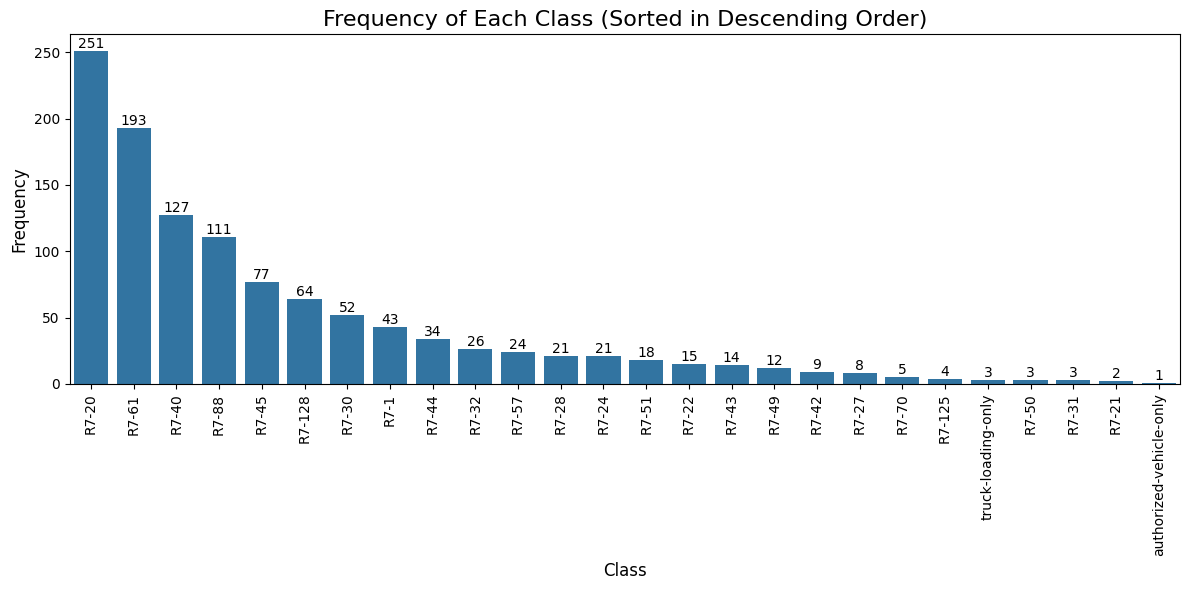

In [94]:
folder = os.path.join(base_dir, "labels") 
txt_filenames = [f for f in os.listdir(folder) if (f.endswith('.txt') and not f.startswith('._'))]
show_dist(txt_filenames)

In [95]:
mutcd_dict[38]

'truck-loading-only'

In [96]:
mutcd_dict[39]

'authorized-vehicle-only'

In [97]:
base_dir = "../../cvat_export/cvat_0129"
label_folder = os.path.join(base_dir, "labels")

txt_filenames = [f for f in os.listdir(label_folder) if (f.endswith('.txt') and not f.startswith('._'))]

signs_to_delete = []

for name in txt_filenames:
    # File path
    file_path = os.path.join(label_folder, name) 

    # Read, modify, and overwrite the file
    with open(file_path, "r") as infile:
        lines4outfile = []
        for line in infile:
            parts = line.strip().split()  # Split the line into parts
            if parts:  # Ensure the line is not empty
                if str(parts[0]) == "38" or str(parts[0]) == "39":
                    file_path = file_path.split("/")[-1].split(".t")[0]
                    print(file_path)
                    print(mutcd_dict[int(parts[0])])
                    signs_to_delete.append(file_path)
signs_to_delete

signid_111-mutcd_R7-1-location_40.845706811,-73.900197364-heading_78.71
truck-loading-only
signid_1794-mutcd_R7-20-location_40.619799115,-73.908635382-heading_86.161
truck-loading-only
signid_110-mutcd_R7-1-location_40.84595762,-73.900058327-heading_79.965
truck-loading-only
signid_115-mutcd_R7-1-location_40.84440326,-73.90092819-heading_78.152
authorized-vehicle-only


['signid_111-mutcd_R7-1-location_40.845706811,-73.900197364-heading_78.71',
 'signid_1794-mutcd_R7-20-location_40.619799115,-73.908635382-heading_86.161',
 'signid_110-mutcd_R7-1-location_40.84595762,-73.900058327-heading_79.965',
 'signid_115-mutcd_R7-1-location_40.84440326,-73.90092819-heading_78.152']

In [98]:
base_dir = "../../cvat_export/cvat_0129"

folder = os.path.join(base_dir, "images")
filenames = [f for f in os.listdir(folder) if (f.endswith('.jpg') and not f.startswith('._'))]

for name in filenames:
    # File path
    file_path = os.path.join(folder, name) 

    if file_path.split("/")[-1].split(".j")[0] in signs_to_delete:
        try:
            os.remove(file_path)
            print(f"Removed: {file_path}")
        except Exception as e:
            print(f"Error removing {file_path}: {e}")
            
folder = os.path.join(base_dir, "labels")
filenames = [f for f in os.listdir(folder) if (f.endswith('.txt') and not f.startswith('._'))]

for name in filenames:
    # File path
    file_path = os.path.join(folder, name) 

    if file_path.split("/")[-1].split(".t")[0] in signs_to_delete:
        try:
            os.remove(file_path)
            print(f"Removed: {file_path}")
        except Exception as e:
            print(f"Error removing {file_path}: {e}")

Removed: ../../cvat_export/cvat_0129/images/signid_1794-mutcd_R7-20-location_40.619799115,-73.908635382-heading_86.161.jpg
Removed: ../../cvat_export/cvat_0129/images/signid_115-mutcd_R7-1-location_40.84440326,-73.90092819-heading_78.152.jpg
Removed: ../../cvat_export/cvat_0129/images/signid_110-mutcd_R7-1-location_40.84595762,-73.900058327-heading_79.965.jpg
Removed: ../../cvat_export/cvat_0129/images/signid_111-mutcd_R7-1-location_40.845706811,-73.900197364-heading_78.71.jpg
Removed: ../../cvat_export/cvat_0129/labels/signid_111-mutcd_R7-1-location_40.845706811,-73.900197364-heading_78.71.txt
Removed: ../../cvat_export/cvat_0129/labels/signid_1794-mutcd_R7-20-location_40.619799115,-73.908635382-heading_86.161.txt
Removed: ../../cvat_export/cvat_0129/labels/signid_110-mutcd_R7-1-location_40.84595762,-73.900058327-heading_79.965.txt
Removed: ../../cvat_export/cvat_0129/labels/signid_115-mutcd_R7-1-location_40.84440326,-73.90092819-heading_78.152.txt


In [99]:
base_dir = "../../cvat_export/cvat_0129"

folder_path = os.path.join(base_dir, "images")
filenames_img = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
print(len(filenames_img))
filenames_img = sorted(filenames_img)
filenames_img = [f.split(".j")[0] for f in filenames_img]

folder_path = os.path.join(base_dir, "labels")
filenames_lbl = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".txt"))]
print(len(filenames_lbl))
filenames_lbl = sorted(filenames_lbl)
filenames_lbl = [f.split(".t")[0] for f in filenames_lbl]

print(filenames_img == filenames_lbl)

1300
1300
True


# Split

In [100]:
base_dir = "../../cvat_export/cvat_0129"

In [101]:
# Folder to clean up
folder_path = os.path.join(base_dir, "images")  
# Traverse the directory
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.startswith('._'):
            file_path = os.path.join(root, file)
            try:
                os.remove(file_path)
                #print(f"Removed: {file_path}")
            except Exception as e:
                print(f"Error removing {file_path}: {e}")

# Folder to clean up
folder_path = os.path.join(base_dir, "labels")
# Traverse the directory
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.startswith('._'):
            file_path = os.path.join(root, file)
            try:
                os.remove(file_path)
                #print(f"Removed: {file_path}")
            except Exception as e:
                print(f"Error removing {file_path}: {e}")

In [102]:
folder_path = os.path.join(base_dir, "images")  
filenames_img = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
filenames_img = sorted(filenames_img)
print(len(filenames_img))
filenames_img = [f.split(".j")[0] for f in filenames_img]

folder_path = os.path.join(base_dir, "labels")  
filenames_lbl = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".txt"))]
filenames_lbl = sorted(filenames_lbl)
print(len(filenames_lbl))
filenames_lbl = [f.split(".t")[0] for f in filenames_lbl]

print(filenames_img == filenames_lbl)

1300
1300
True


In [104]:
folder_path = os.path.join(base_dir, "images")  

filenames_img = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) & f.endswith((".jpg", ".png"))]
filenames_img = sorted(filenames_img)
print(len(filenames_img))

filenames_img = [f for f in os.listdir(folder_path) if not f.startswith('._')]
filenames_img = [f.split(".j")[0] for f in filenames_img]

random.seed(0)
random.shuffle(filenames_img)

# Calculate the split index
split_0 = int(len(filenames_img) * 0.8)
split_1 = int(len(filenames_img) * 0.9)

# Split into training and testing sets
train_ids = filenames_img[:split_0]
val_ids = filenames_img[split_0:split_1]
test_ids = filenames_img[split_1:]
print(len(train_ids))
print(train_ids[0:5])
print(len(val_ids))
print(val_ids[0:5])
print(len(test_ids))
print(test_ids[0:5])

1300
1040
['signid_2999-mutcd_R7-40-location_40.596900885,-73.779395422-heading_275.54', 'signid_68-mutcd_R7-1-location_40.567921935,-73.863276888-heading_213.646', 'signid_10588-mutcd_R7-61-location_40.713255687,-73.903990592-heading_166.816', 'signid_2166-mutcd_R7-20-location_40.593290707,-73.771891222-heading_89.152', 'signid_2793-mutcd_R7-32-location_40.763062935,-73.753063584-heading_120.777']
130
['signid_9725-mutcd_R7-45-location_40.746220494,-73.803392508-heading_125.329', 'signid_1483-mutcd_R7-20-location_40.713809511,-73.796625661-heading_163.698', 'signid_2530-mutcd_R7-30-location_40.723691777,-73.798188149-heading_286.894', 'signid_173-mutcd_R7-1-location_40.697965731,-73.973527371-heading_324.815', 'signid_7491-mutcd_R7-40-location_40.634145436,-74.118432298-heading_203.26']
130
['signid_2035-mutcd_R7-20-location_40.725402994,-73.906150584-heading_239.652', 'signid_2725-mutcd_R7-32-location_40.761682316,-73.760117235-heading_191.893', 'signid_10482-mutcd_R7-61-location_40.

## distribution of train set candi 

In [105]:
base_dir = "../../cvat_export/cvat_0129"

In [106]:
folder = os.path.join(base_dir, "labels")  
filenames_lbl = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) & f.endswith((".txt"))]
filenames_lbl = sorted(filenames_lbl)
print(len(filenames_lbl))
filenames_lbl = [f for f in filenames_lbl if f.split(".t")[0] in train_ids] # important: train_ids
print(len(filenames_lbl))
filenames_lbl[0:5]

1300
1040


['signid_100-mutcd_R7-1-location_40.849914685,-73.898255013-heading_139.414.txt',
 'signid_1000-mutcd_R7-20-location_40.77764749,-73.893514257-heading_201.477.txt',
 'signid_10000-mutcd_R7-51-location_40.712987445,-73.907559555-heading_222.59.txt',
 'signid_10000-mutcd_R7-51-location_40.712991965,-73.907642327-heading_147.066.txt',
 'signid_10001-mutcd_R7-51-location_40.712980208,-73.907427025-heading_221.412.txt']

['R7-1', 'R7-51', 'R7-51', 'R7-51', 'R7-51']

     Class  Frequency
3    R7-20        206
4    R7-61        156
5    R7-40        105
12   R7-88         92
7    R7-45         61
9   R7-128         50
10   R7-30         39
0     R7-1         33
16   R7-44         28
2    R7-57         18
15   R7-28         18
20   R7-24         18
23   R7-32         16
1    R7-51         14
14   R7-43         13
19   R7-22         12
13   R7-49         10
8    R7-42          7
21   R7-27          7
6   R7-125          3
11   R7-50          3
17   R7-70          3
18   R7-21          2
22   R7-31          2



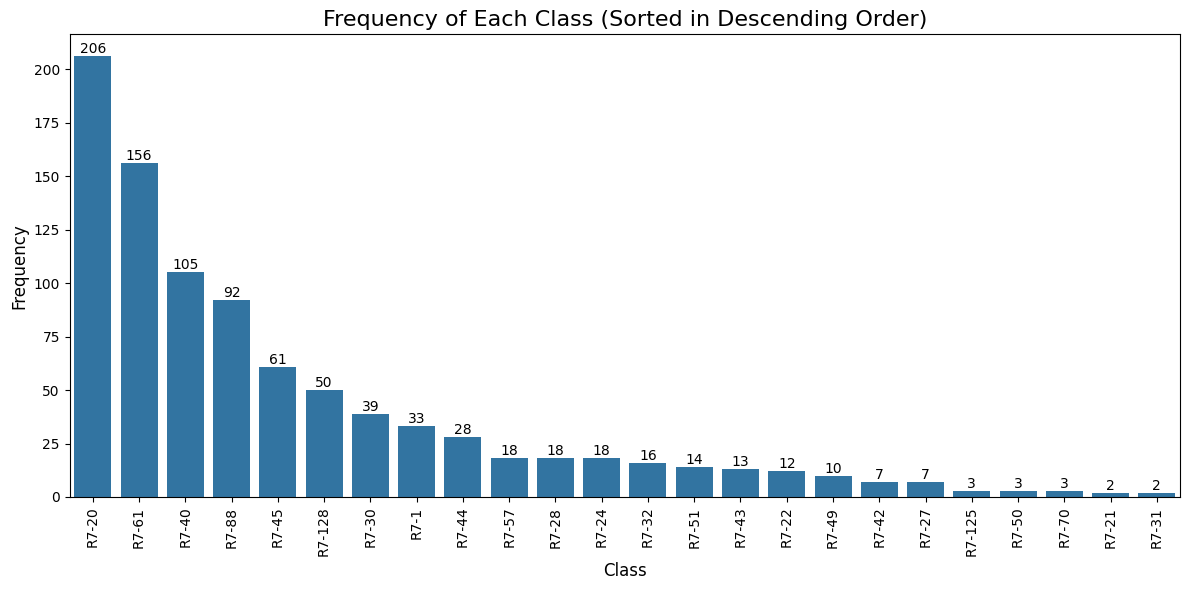

In [107]:
show_dist(filenames_lbl)

## distribution of val set candi 

In [108]:
folder = os.path.join(base_dir, "labels")  
filenames_lbl = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) & f.endswith((".txt"))]
filenames_lbl = sorted(filenames_lbl)
print(len(filenames_lbl))
filenames_lbl = [f for f in filenames_lbl if f.split(".t")[0] in val_ids] # important: val_ids
print(len(filenames_lbl))
filenames_lbl[0:5]

1300
130


['signid_10001-mutcd_R7-51-location_40.712984702,-73.907509318-heading_147.248.txt',
 'signid_10014-mutcd_R7-57-location_40.787446302,-73.802344391-heading_243.701.txt',
 'signid_10016-mutcd_R7-57-location_40.786596187,-73.802450538-heading_303.109.txt',
 'signid_10031-mutcd_R7-57-location_40.714836106,-73.783239671-heading_219.816.txt',
 'signid_10034-mutcd_R7-57-location_40.697539923,-73.898782216-heading_79.455.txt']

['R7-51', 'R7-57', 'R7-57', 'R7-61', 'R7-61']

     Class  Frequency
5    R7-20         23
2    R7-61         13
3    R7-40         11
11   R7-88          9
4   R7-128          8
8    R7-45          7
16   R7-30          6
17   R7-32          5
9     R7-1          5
1    R7-57          4
20   R7-44          3
15   R7-28          2
19   R7-42          2
0    R7-51          2
10   R7-70          2
14   R7-27          1
13   R7-24          1
12   R7-22          1
7    R7-43          1
18  R7-125          1
6    R7-49          1



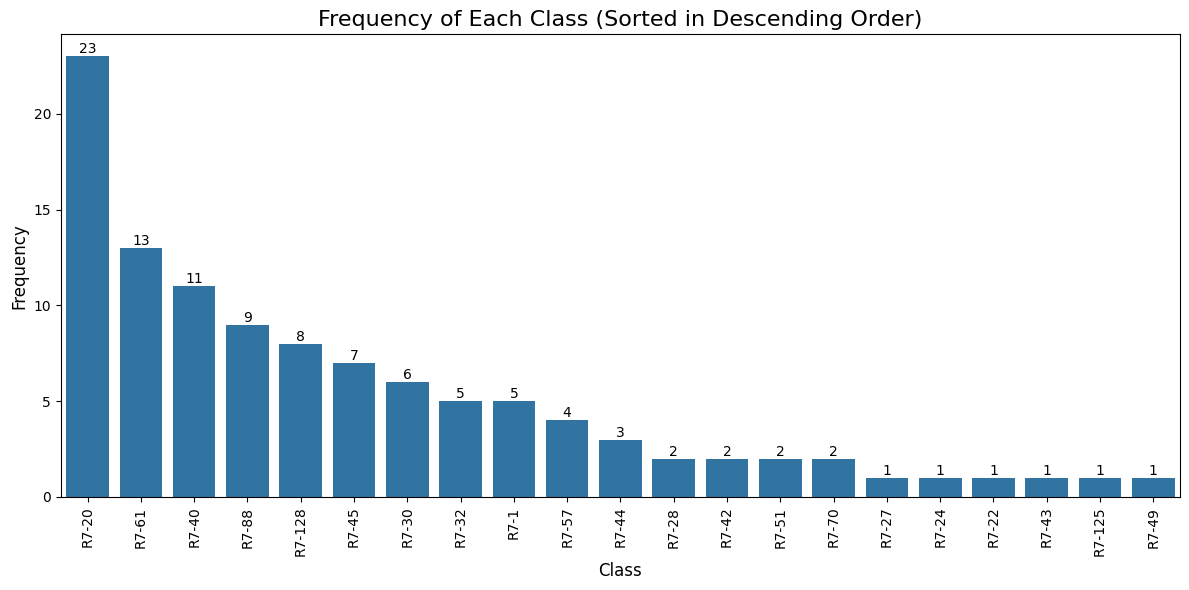

In [109]:
show_dist(filenames_lbl)

## distribution of test set candi 

In [110]:
folder = os.path.join(base_dir, "labels")  
filenames_lbl = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) & f.endswith((".txt"))]
filenames_lbl = sorted(filenames_lbl)
print(len(filenames_lbl))
filenames_lbl = [f for f in filenames_lbl if f.split(".t")[0] in test_ids] # important: val_ids
print(len(filenames_lbl))
filenames_lbl[0:5]

1300
130


['signid_100-mutcd_R7-1-location_40.849854989,-73.89828847-heading_81.499.txt',
 'signid_10006-mutcd_R7-51-location_40.713302211,-73.912521961-heading_154.039.txt',
 'signid_10012-mutcd_R7-51-location_40.712799174,-73.903201796-heading_148.716.txt',
 'signid_10024-mutcd_R7-57-location_40.787430138,-73.802346482-heading_125.974.txt',
 'signid_10032-mutcd_R7-57-location_40.714463382,-73.783083533-heading_285.521.txt']

['R7-1', 'R7-51', 'R7-51', 'R7-57', 'R7-57']

     Class  Frequency
3    R7-61         24
4    R7-20         22
5    R7-40         11
8    R7-88         10
15   R7-45          9
12   R7-30          7
6   R7-128          6
13   R7-32          5
0     R7-1          5
14   R7-44          3
9    R7-22          2
10   R7-24          2
1    R7-51          2
2    R7-57          2
11   R7-28          1
7    R7-49          1
16   R7-31          1



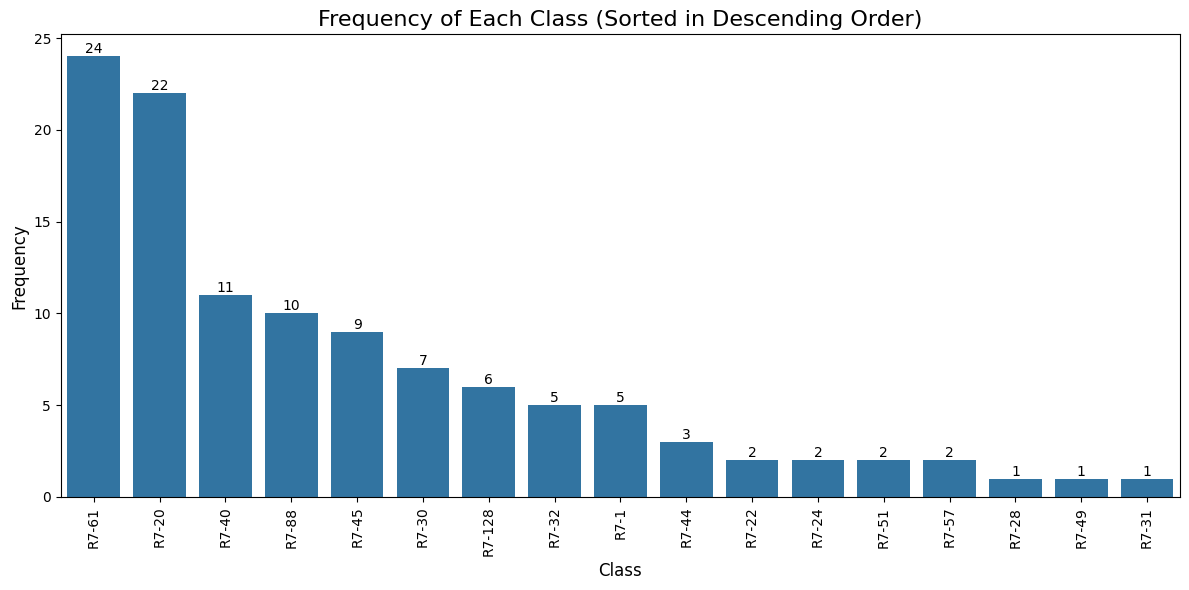

In [111]:
show_dist(filenames_lbl)

## split

In [112]:
# List of filenames to filter
# Define source and target folders
source_folder = os.path.join(base_dir, "images")  
target_folders = [os.path.join(source_folder, "train"), 
                  os.path.join(source_folder, "val"),
                  os.path.join(source_folder, "test")]
expander = ".jpg"
sets = [train_ids, val_ids, test_ids]

for i in range(3):
    set_i = sets[i]
    target_folder_i = target_folders[i]
    
    set_i = [f + expander for f in set_i]

    # Create target folder if it does not exist
    os.makedirs(target_folder_i, exist_ok=True)

    # Loop through each filename in the list and move it if it exists
    for f in set_i:
        source_file = os.path.join(source_folder, f)
        target_file = os.path.join(target_folder_i, f)
    
        # Check if the file exists in the source folder
        if os.path.isfile(source_file):
            shutil.move(source_file, target_file)
            #print(f"Copied: {filename}")
        #else:
            #print(f"File not found: {filename}")

# Path to the directory
root_dir = source_folder

# Traverse the directory recursively
for root, dirs, files in os.walk(root_dir):
    num_files = len(files)  # Count files in the current folder
    folder_name = os.path.relpath(root, root_dir)  # Relative folder path
    print(f"Folder: {folder_name}, Number of files: {num_files}")

Folder: ., Number of files: 0
Folder: train, Number of files: 1040
Folder: test, Number of files: 130
Folder: val, Number of files: 130


In [117]:
# List of filenames to filter
# Define source and target folders
source_folder = os.path.join(base_dir, "labels")  
target_folders = [os.path.join(source_folder, "train"), 
                  os.path.join(source_folder, "val"),
                  os.path.join(source_folder, "test")]
expander = ".txt"
sets = [train_ids, val_ids, test_ids]

for i in range(3):
    set_i = sets[i]
    target_folder_i = target_folders[i]
    
    set_i = [f + expander for f in set_i]

    # Create target folder if it does not exist
    os.makedirs(target_folder_i, exist_ok=True)

    # Loop through each filename in the list and move it if it exists
    for f in set_i:
        source_file = os.path.join(source_folder, f)
        target_file = os.path.join(target_folder_i, f)
    
        # Check if the file exists in the source folder
        if os.path.isfile(source_file):
            shutil.move(source_file, target_file)
            #print(f"Copied: {filename}")
        #else:
            #print(f"File not found: {filename}")

# Path to the directory
root_dir = source_folder

# Traverse the directory recursively
for root, dirs, files in os.walk(root_dir):
    num_files = len(files)  # Count files in the current folder
    folder_name = os.path.relpath(root, root_dir)  # Relative folder path
    print(f"Folder: {folder_name}, Number of files: {num_files}")

Folder: ., Number of files: 0
Folder: train, Number of files: 1040
Folder: test, Number of files: 130
Folder: val, Number of files: 130


# Prep for NC-1 model

In [116]:
base_dir

'../../cvat_export/cvat_0129'

In [118]:
# Define the current folder paths and the target folder
current_folder = os.path.join(base_dir, "labels") 
target_folder = current_folder + "_nc_1"

shutil.copytree(current_folder, target_folder)
print(f"Copied folder from '{current_folder}' to '{target_folder}'.")

Copied folder from '../../cvat_export/cvat_0129/labels' to '../../cvat_export/cvat_0129/labels_nc_1'.


In [121]:
current_folder = os.path.join(base_dir, "labels") 
target_folder = current_folder + "_nc_1"

label_folders = [os.path.join(target_folder, "train"), 
                 os.path.join(target_folder, "val"),
                 os.path.join(target_folder, "test")]

for label_folder in label_folders:
    txt_filenames = [f for f in os.listdir(label_folder) if (f.endswith('.txt') and not f.startswith('._'))]

    for name in txt_filenames:
        # File path
        file_path = os.path.join(label_folder, name) 
        
        # Read, modify, and overwrite the file
        with open(file_path, "r") as infile:
            lines4outfile = []
            for line in infile:
                if line: 
                    parts = line.strip().split()  # Split the line into parts
                    if len(parts) > 0:  # Ensure the line is not empty
                        parts[0] = "0"  # Change the first part (ID) to 0
                        lines4outfile.append(" ".join(parts))  # Rejoin the line
            # Save the modified content back to the same file
            with open(file_path, "w") as outfile:
                lines4outfile = "\n".join(lines4outfile)
                outfile.write(lines4outfile.rstrip("\n"))

In [122]:
current_folder = os.path.join(base_dir, "labels") 
target_folder = current_folder + "_nc_1"

label_folders = [os.path.join(target_folder, "train"), 
                 os.path.join(target_folder, "val"),
                 os.path.join(target_folder, "test")]

for label_folder in label_folders:
    txt_filenames = [f for f in os.listdir(label_folder) if (f.endswith('.txt') and not f.startswith('._'))]

    for i, name in enumerate(txt_filenames[:2]):
        # File path
        file_path = os.path.join(label_folder, name) 
        print(f"{i+1}th: {file_path}")
        # Read, modify, and overwrite the file
        with open(file_path, "r") as file:
            data = file.read()
            print(data)
    print("\nnext group following: ")

1th: ../../cvat_export/cvat_0129/labels_nc_1/train/signid_2219-mutcd_R7-20-location_40.641770605,-74.089723674-heading_21.868.txt
0 0.888320 0.403406 0.018828 0.044437
2th: ../../cvat_export/cvat_0129/labels_nc_1/train/signid_12131-mutcd_R7-61-location_40.655445968,-73.828435197-heading_196.128.txt
0 0.957555 0.306086 0.084891 0.065641

next group following: 
1th: ../../cvat_export/cvat_0129/labels_nc_1/val/signid_2504-mutcd_R7-30-location_40.759283253,-73.799037963-heading_49.834.txt

2th: ../../cvat_export/cvat_0129/labels_nc_1/val/signid_132-mutcd_R7-1-location_40.877985205,-73.885208504-heading_70.532.txt
0 0.825906 0.300078 0.053688 0.063906

next group following: 
1th: ../../cvat_export/cvat_0129/labels_nc_1/test/signid_10183-mutcd_R7-61-location_40.735720994,-73.850798215-heading_306.768.txt
0 0.532422 0.441375 0.050469 0.081625
2th: ../../cvat_export/cvat_0129/labels_nc_1/test/signid_10054-mutcd_R7-57-location_40.716971697,-73.784439171-heading_283.533.txt


next group followin

# Prep for NC-5 model

In [130]:
# Define the current folder paths and the target folder
current_folder = os.path.join(base_dir, "labels") 
target_folder = current_folder + "_nc_5"

shutil.copytree(current_folder, target_folder)
print(f"Copied folder from '{current_folder}' to '{target_folder}'.")

Copied folder from '../../cvat_export/cvat_0129/labels' to '../../cvat_export/cvat_0129/labels_nc_5'.


In [144]:
# List of all 40 classes
classes = [
    "empty-so-disregard",
    "R7-1",
    "R7-20",
    "R7-21",
    "R7-22",
    "R7-24",
    "R7-27",
    "R7-28",
    "R7-30",
    "R7-31",
    "R7-32",
    "R7-34",
    "R7-40",
    "R7-41",
    "R7-42",
    "R7-43",
    "R7-44",
    "R7-45",
    "R7-49",
    "R7-50",
    "R7-51",
    "R7-55",
    "R7-56",
    "R7-57",
    "R7-59",
    "R7-61",
    "R7-65",
    "R7-66",
    "R7-68",
    "R7-69",
    "R7-70",
    "R7-88",
    "R7-100",
    "R7-101",
    "R7-110",
    "R7-125",
    "R7-128",
    "R7-182",
    "truck-loading-only",
    "authorized-vehicle-only"
]

In [132]:
# Set of permissive classes
prohibAnytime = {"R7-1",
                "R7-20",
                "R7-40",
                'R7-65', # NO PARKING LOADING ZONE 
                'R7-66', # NO PARKING PASSENGER LOADING ZONE 
                'R7-68', # NO PARKING ANYTIME CONSTRUCTION 
                "R7-110"} # TOW AWAY ZONE 
prohibSometimes = {
    # HalfDay
             "R7-24",
             "R7-27",
             "R7-28",
             "R7-30",
             "R7-31",
             "R7-32",
             "R7-34", # NO STANDING 1-7PM EXCEPT SUNDAY
            "R7-49",
            "R7-50",
            "R7-51",
            "R7-55",
            "R7-56",
            "R7-57",
            "R7-59",  # NO PARKING 7-10AM MON THRU FRI
    # FullDay
             "R7-21",
             "R7-22",
             "R7-41", # NO PARKING 8AM-MIDNIGHT EXCEPT SUNDAY
             "R7-42",
             "R7-43",
             "R7-44",
             "R7-45",
             "R7-69", # NO PARKING 7AM-6PM MON THRU FRI CONSTRUCTION
             "R7-70"} # NO PARKING 7AM-4PM SCHOOL DAYS
prohibForBusStop = {"R7-61"}
prohibForCleaning = {"R7-88"}
allow = {"R7-125", 
         "R7-128",
         "R7-182", # 2 HOUR PARKING 9AM-7PM EXCEPT SUNDAY
         "R7-100", # PARALLEL PARKING ONLY 
         "R7-101"  # ANGLE PARKING ONLY 
        }

In [133]:
# Mapping function with refactored logic
def map_to_category(class_name):
    # Define category mappings
    category_mapping = {
        "prohibAnytime": prohibAnytime,
        "prohibSometimes": prohibSometimes,
        "prohibForBusStop": prohibForBusStop,
        "prohibForCleaning": prohibForCleaning,
        "allow": allow
    }

    # Check the class_name against each category
    for category, class_set in category_mapping.items():
        if class_name in class_set:
            return category

    # Default return if no match is found
    return "unknown"

In [134]:
# Test the mapping function
mapped_classes = {cls: map_to_category(cls) for cls in classes}

# Print the mapping
mapped_classes

{'empty-so-disregard': 'unknown',
 'R7-1': 'prohibAnytime',
 'R7-20': 'prohibAnytime',
 'R7-21': 'prohibSometimes',
 'R7-22': 'prohibSometimes',
 'R7-24': 'prohibSometimes',
 'R7-27': 'prohibSometimes',
 'R7-28': 'prohibSometimes',
 'R7-30': 'prohibSometimes',
 'R7-31': 'prohibSometimes',
 'R7-32': 'prohibSometimes',
 'R7-34': 'prohibSometimes',
 'R7-40': 'prohibAnytime',
 'R7-41': 'prohibSometimes',
 'R7-42': 'prohibSometimes',
 'R7-43': 'prohibSometimes',
 'R7-44': 'prohibSometimes',
 'R7-45': 'prohibSometimes',
 'R7-49': 'prohibSometimes',
 'R7-50': 'prohibSometimes',
 'R7-51': 'prohibSometimes',
 'R7-55': 'prohibSometimes',
 'R7-56': 'prohibSometimes',
 'R7-57': 'prohibSometimes',
 'R7-59': 'prohibSometimes',
 'R7-61': 'prohibForBusStop',
 'R7-65': 'prohibAnytime',
 'R7-66': 'prohibAnytime',
 'R7-68': 'prohibAnytime',
 'R7-69': 'prohibSometimes',
 'R7-70': 'prohibSometimes',
 'R7-88': 'prohibForCleaning',
 'R7-100': 'allow',
 'R7-101': 'allow',
 'R7-110': 'prohibAnytime',
 'R7-125'

In [151]:
current_folder = os.path.join(base_dir, "labels") 
target_folder = current_folder + "_nc_5"

label_folders = [os.path.join(target_folder, "train"), 
                 os.path.join(target_folder, "val")]

distinct_indx = []

for label_folder in label_folders:
    txt_filenames = [f for f in os.listdir(label_folder) if (f.endswith('.txt') and not f.startswith('._'))]

    for name in txt_filenames:
        # File path
        file_path = os.path.join(label_folder, name) 
        
        # Read, modify, and overwrite the file
        with open(file_path, "r") as infile:
            for line in infile:
                parts = line.strip().split()  # Split the line into parts
                if parts:  # Ensure the line is not empty
                    #print(parts[0], end=",")
                    distinct_indx.append(int(parts[0]))
distinct_indx = set(distinct_indx)
print(distinct_indx)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 23, 25, 30, 31, 35, 36}


In [128]:
mapped_classes_keys = list(mapped_classes.keys())
#mapped_classes_keys
print(mapped_classes_keys[1])
print(mapped_classes[mapped_classes_keys[1]])

R7-1
prohibAnytime


In [135]:
current_folder = os.path.join(base_dir, "labels") 
target_folder = current_folder + "_nc_5"

label_folders = [os.path.join(target_folder, "train"), 
                 os.path.join(target_folder, "val"), 
                 os.path.join(target_folder, "test")]

classes =  {"prohibAnytime": 0,
            "prohibSometimes": 1,
            "prohibForBusStop": 2,
            "prohibForCleaning": 3,
            "allow": 4}

for label_folder in label_folders:
    txt_filenames = [f for f in os.listdir(label_folder) if (f.endswith('.txt') and not f.startswith('._'))]

    for name in txt_filenames:
        # File path
        file_path = os.path.join(label_folder, name) 
        
        # Read, modify, and overwrite the file
        with open(file_path, "r") as infile:
            lines4outfile = []
            for line in infile:
                parts = line.strip().split()  # Split the line into parts
                if len(parts) > 0:  # Ensure the line is not empty
                    parts[0] = mapped_classes[mapped_classes_keys[int(parts[0])]]   
                    #print(parts[0])
                    parts[0] = str(parts[0])
                    if str(classes[parts[0]]) == "unknown":
                        print("discard unknown instances")
                        print(str(classes[parts[0]]))
                    else:
                        parts[0] = str(classes[parts[0]])
                        lines4outfile.append(" ".join(parts))  # Rejoin the line

        #print(lines4outfile)

        # Save the modified content back to the same file
        with open(file_path, "w") as outfile:
            lines4outfile = "\n".join(lines4outfile)
            outfile.write(lines4outfile.rstrip("\n"))

In [136]:
current_folder = os.path.join(base_dir, "labels") 
target_folder = current_folder + "_nc_5"

label_folders = [os.path.join(target_folder, "train"), 
                 os.path.join(target_folder, "val"), 
                 os.path.join(target_folder, "test")]

for label_folder in label_folders:
    txt_filenames = [f for f in os.listdir(label_folder) if (f.endswith('.txt') and not f.startswith('._'))]

    for i, name in enumerate(txt_filenames[:2]):
        # File path
        file_path = os.path.join(label_folder, name) 
        print(f"{i+1}th: {file_path}")
        # Read, modify, and overwrite the file
        with open(file_path, "r") as file:
            data = file.read()
            print(data)
    print("\nnext group following: ")

1th: ../../cvat_export/cvat_0129/labels_nc_5/train/signid_2219-mutcd_R7-20-location_40.641770605,-74.089723674-heading_21.868.txt
0 0.888320 0.403406 0.018828 0.044437
2th: ../../cvat_export/cvat_0129/labels_nc_5/train/signid_12131-mutcd_R7-61-location_40.655445968,-73.828435197-heading_196.128.txt
0 0.957555 0.306086 0.084891 0.065641

next group following: 
1th: ../../cvat_export/cvat_0129/labels_nc_5/val/signid_2504-mutcd_R7-30-location_40.759283253,-73.799037963-heading_49.834.txt

2th: ../../cvat_export/cvat_0129/labels_nc_5/val/signid_132-mutcd_R7-1-location_40.877985205,-73.885208504-heading_70.532.txt
1 0.825906 0.300078 0.053688 0.063906

next group following: 
1th: ../../cvat_export/cvat_0129/labels_nc_5/test/signid_10183-mutcd_R7-61-location_40.735720994,-73.850798215-heading_306.768.txt
2 0.532422 0.441375 0.050469 0.081625
2th: ../../cvat_export/cvat_0129/labels_nc_5/test/signid_10054-mutcd_R7-57-location_40.716971697,-73.784439171-heading_283.533.txt


next group followin

# Prep for NC-6 model

In [145]:
# Define the current folder paths and the target folder
current_folder = os.path.join(base_dir, "labels") 
target_folder = current_folder + "_nc_6"

shutil.copytree(current_folder, target_folder)
print(f"Copied folder from '{current_folder}' to '{target_folder}'.")

Copied folder from '../../cvat_export/cvat_0129/labels' to '../../cvat_export/cvat_0129/labels_nc_6'.


In [146]:
# Set of permissive classes
prohibAnytime = {"R7-1",
                "R7-20",
                "R7-40",
                'R7-65', # NO PARKING LOADING ZONE 
                'R7-66', # NO PARKING PASSENGER LOADING ZONE 
                'R7-68', # NO PARKING ANYTIME CONSTRUCTION 
                "R7-110"} # TOW AWAY ZONE 
prohibHalfDay = {
             "R7-24",
             "R7-27",
             "R7-28",
             "R7-30",
             "R7-31",
             "R7-32",
             "R7-34", # NO STANDING 1-7PM EXCEPT SUNDAY
            "R7-49",
            "R7-50",
            "R7-51",
            "R7-55",
            "R7-56",
            "R7-57",
            "R7-59"}  # NO PARKING 7-10AM MON THRU FRI
prohibFullDay = {
             "R7-21",
             "R7-22",
             "R7-41", # NO PARKING 8AM-MIDNIGHT EXCEPT SUNDAY
             "R7-42",
             "R7-43",
             "R7-44",
             "R7-45",
             "R7-69", # NO PARKING 7AM-6PM MON THRU FRI CONSTRUCTION
             "R7-70"} # NO PARKING 7AM-4PM SCHOOL DAYS
prohibForBusStop = {"R7-61"}
prohibForCleaning = {"R7-88"}
allow = {"R7-125", 
         "R7-128",
         "R7-182", # 2 HOUR PARKING 9AM-7PM EXCEPT SUNDAY
         "R7-100", # PARALLEL PARKING ONLY 
         "R7-101"  # ANGLE PARKING ONLY 
        }

In [148]:
# Mapping function with refactored logic
def map_to_category(class_name):
    # Define category mappings
    category_mapping = {
        "prohibAnytime": prohibAnytime,
        "prohibHalfDay": prohibHalfDay,
        "prohibFullDay": prohibFullDay,
        "prohibForBusStop": prohibForBusStop,
        "prohibForCleaning": prohibForCleaning,
        "allow": allow
    }

    # Check the class_name against each category
    for category, class_set in category_mapping.items():
        if class_name in class_set:
            return category

    # Default return if no match is found
    return "unknown"

In [149]:
# Test the mapping function
mapped_classes = {cls: map_to_category(cls) for cls in classes}

# Print the mapping
mapped_classes

{'empty-so-disregard': 'unknown',
 'R7-1': 'prohibAnytime',
 'R7-20': 'prohibAnytime',
 'R7-21': 'prohibFullDay',
 'R7-22': 'prohibFullDay',
 'R7-24': 'prohibHalfDay',
 'R7-27': 'prohibHalfDay',
 'R7-28': 'prohibHalfDay',
 'R7-30': 'prohibHalfDay',
 'R7-31': 'prohibHalfDay',
 'R7-32': 'prohibHalfDay',
 'R7-34': 'prohibHalfDay',
 'R7-40': 'prohibAnytime',
 'R7-41': 'prohibFullDay',
 'R7-42': 'prohibFullDay',
 'R7-43': 'prohibFullDay',
 'R7-44': 'prohibFullDay',
 'R7-45': 'prohibFullDay',
 'R7-49': 'prohibHalfDay',
 'R7-50': 'prohibHalfDay',
 'R7-51': 'prohibHalfDay',
 'R7-55': 'prohibHalfDay',
 'R7-56': 'prohibHalfDay',
 'R7-57': 'prohibHalfDay',
 'R7-59': 'prohibHalfDay',
 'R7-61': 'prohibForBusStop',
 'R7-65': 'prohibAnytime',
 'R7-66': 'prohibAnytime',
 'R7-68': 'prohibAnytime',
 'R7-69': 'prohibFullDay',
 'R7-70': 'prohibFullDay',
 'R7-88': 'prohibForCleaning',
 'R7-100': 'allow',
 'R7-101': 'allow',
 'R7-110': 'prohibAnytime',
 'R7-125': 'allow',
 'R7-128': 'allow',
 'R7-182': 'all

In [150]:
current_folder = os.path.join(base_dir, "labels") 
target_folder = current_folder + "_nc_6"

label_folders = [os.path.join(target_folder, "train"), 
                 os.path.join(target_folder, "val"), 
                 os.path.join(target_folder, "test")]

distinct_indx = []

for label_folder in label_folders:
    txt_filenames = [f for f in os.listdir(label_folder) if (f.endswith('.txt') and not f.startswith('._'))]

    for name in txt_filenames:
        # File path
        file_path = os.path.join(label_folder, name) 
        
        # Read, modify, and overwrite the file
        with open(file_path, "r") as infile:
            for line in infile:
                parts = line.strip().split()  # Split the line into parts
                if parts:  # Ensure the line is not empty
                    #print(parts[0], end=",")
                    distinct_indx.append(int(parts[0]))
distinct_indx = set(distinct_indx)
print(distinct_indx)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 23, 25, 30, 31, 35, 36}


In [151]:
mapped_classes_keys = list(mapped_classes.keys())
#mapped_classes_keys
print(mapped_classes_keys[1])
print(mapped_classes[mapped_classes_keys[1]])

R7-1
prohibAnytime


In [152]:
current_folder = os.path.join(base_dir, "labels") 
target_folder = current_folder + "_nc_6"

label_folders = [os.path.join(target_folder, "train"), 
                 os.path.join(target_folder, "val"), 
                 os.path.join(target_folder, "test")]

classes =  {
        "prohibAnytime": 0,
        "prohibHalfDay": 1,
        "prohibFullDay": 2,
        "prohibForBusStop": 3,
        "prohibForCleaning": 4,
        "allow": 5}

for label_folder in label_folders:
    txt_filenames = [f for f in os.listdir(label_folder) if (f.endswith('.txt') and not f.startswith('._'))]

    for name in txt_filenames:
        # File path
        file_path = os.path.join(label_folder, name) 
        
        # Read, modify, and overwrite the file
        with open(file_path, "r") as infile:
            lines4outfile = []
            for line in infile:
                parts = line.strip().split()  # Split the line into parts
                if len(parts) > 0:  # Ensure the line is not empty
                    parts[0] = mapped_classes[mapped_classes_keys[int(parts[0])]]   
                    #print(parts[0])
                    parts[0] = str(parts[0])
                    if str(classes[parts[0]]) == "unknown":
                        print("discard unknown instances")
                        print(str(classes[parts[0]]))
                    else:
                        parts[0] = str(classes[parts[0]])
                        lines4outfile.append(" ".join(parts))  # Rejoin the line

        #print(lines4outfile)

        # Save the modified content back to the same file
        with open(file_path, "w") as outfile:
            lines4outfile = "\n".join(lines4outfile)
            outfile.write(lines4outfile.rstrip("\n"))

In [153]:
current_folder = os.path.join(base_dir, "labels") 
target_folder = current_folder + "_nc_6"

label_folders = [os.path.join(target_folder, "train"), 
                 os.path.join(target_folder, "val"), 
                 os.path.join(target_folder, "test")]

for label_folder in label_folders:
    txt_filenames = [f for f in os.listdir(label_folder) if (f.endswith('.txt') and not f.startswith('._'))]

    for i, name in enumerate(txt_filenames[:2]):
        # File path
        file_path = os.path.join(label_folder, name) 
        print(f"{i+1}th: {file_path}")
        # Read, modify, and overwrite the file
        with open(file_path, "r") as file:
            data = file.read()
            print(data)
    print("\nnext group following: ")

1th: ../../cvat_export/cvat_0129/labels_nc_6/train/signid_2219-mutcd_R7-20-location_40.641770605,-74.089723674-heading_21.868.txt
0 0.888320 0.403406 0.018828 0.044437
2th: ../../cvat_export/cvat_0129/labels_nc_6/train/signid_12131-mutcd_R7-61-location_40.655445968,-73.828435197-heading_196.128.txt
0 0.957555 0.306086 0.084891 0.065641

next group following: 
1th: ../../cvat_export/cvat_0129/labels_nc_6/val/signid_2504-mutcd_R7-30-location_40.759283253,-73.799037963-heading_49.834.txt

2th: ../../cvat_export/cvat_0129/labels_nc_6/val/signid_132-mutcd_R7-1-location_40.877985205,-73.885208504-heading_70.532.txt
2 0.825906 0.300078 0.053688 0.063906

next group following: 
1th: ../../cvat_export/cvat_0129/labels_nc_6/test/signid_10183-mutcd_R7-61-location_40.735720994,-73.850798215-heading_306.768.txt
3 0.532422 0.441375 0.050469 0.081625
2th: ../../cvat_export/cvat_0129/labels_nc_6/test/signid_10054-mutcd_R7-57-location_40.716971697,-73.784439171-heading_283.533.txt


next group followin

# Manually handle data.yaml files

## please don't skip this step

In [ ]:
base_dir = '../../cvat_export'

In [ ]:
# insert the following for all .yaml files
# path: ../../cvat_export/cvat_0129_processed_unzipped

# Zip the whole folder for reusability 

In [154]:
base_dir = '../../cvat_export'

In [155]:
# Path to the folder you want to zip
folder_path = os.path.join(base_dir, "cvat_0129")

# Output path for the zip file (without extension)
output_path = os.path.join(base_dir, "cvat_0129_processed")

# Create a zip archive
shutil.make_archive(output_path, 'zip', folder_path)

print(f"Folder successfully zipped to {output_path}.zip")

Folder successfully zipped to ../../cvat_export/cvat_0129_processed.zip
